In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('..\Datasets\loan_data_set.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df = df.dropna()


In [5]:
df['Dependents'] = df['Dependents'].str.replace('+','')
df['Dependents'] = df['Dependents'].astype('int64')

<ipython-input-5-a1ee8ca8c365>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Dependents'] = df['Dependents'].str.replace('+','')


In [7]:
print(df['Education'].value_counts())
def convert(data):
    if data == 'Graduate':
        return 1
    
    else:
        return 0
df['Education'] = df['Education'].apply(convert)

Graduate        383
Not Graduate     97
Name: Education, dtype: int64


In [8]:
df['Education'].value_counts()


1    383
0     97
Name: Education, dtype: int64

In [9]:
df['Gender'] = df.Gender.map(dict(Male = 1,Female = 0))

In [10]:
df['Gender'].value_counts()


1    394
0     86
Name: Gender, dtype: int64

In [11]:
df['Married'] = df['Married'].map(dict(Yes = 1,No =0))

In [12]:
df['Married'].value_counts()

1    311
0    169
Name: Married, dtype: int64

In [13]:
df['Self_Employed'] = df.Self_Employed.map(dict(No = 0,Yes = 1)) 

In [14]:
df['Self_Employed'].value_counts()

0    414
1     66
Name: Self_Employed, dtype: int64

In [15]:
df['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [16]:
df['Property_Area']= df.Property_Area.map(dict(Semiurban=0, Urban=1,Rural = 2))

In [17]:
df['Property_Area'].value_counts()

0    191
1    150
2    139
Name: Property_Area, dtype: int64

In [18]:
df['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [19]:
df['Loan_Status'] = df['Loan_Status'].map(dict(Y = 1,N = 0))

In [20]:
df['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 52.5+ KB


In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


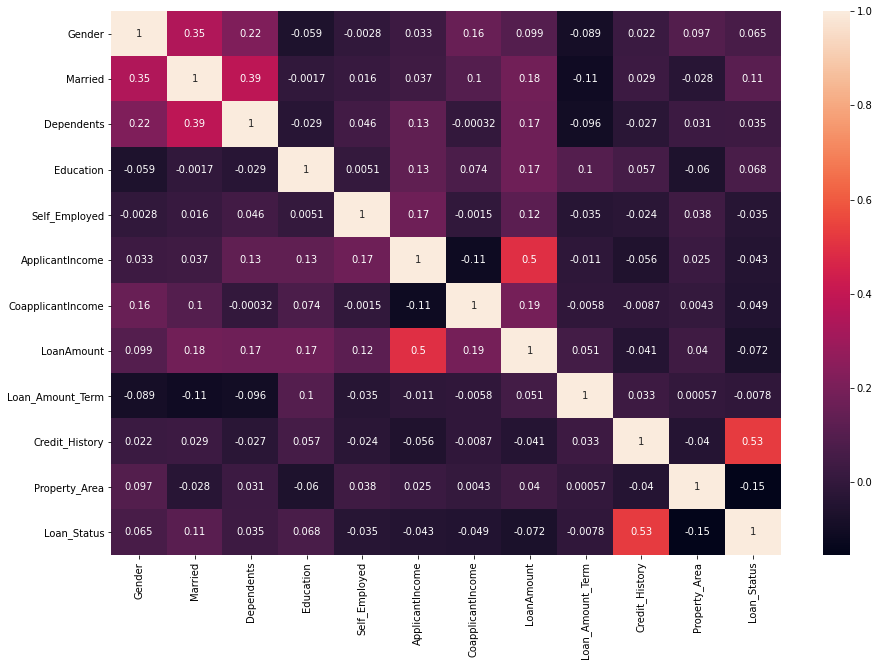

In [23]:
fig = plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

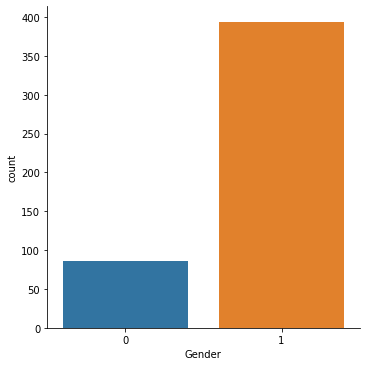

In [24]:
sns.catplot(data = df ,x = 'Gender',kind = 'count')

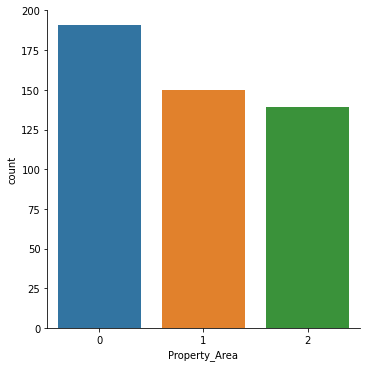

In [25]:
sns.catplot(data = df ,x = 'Property_Area',kind = 'count')

In [26]:
x = df.drop(columns  =['Loan_Status','Loan_ID'],axis = 1)
y = df[['Loan_Status']]

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
ypred

C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
acc = accuracy_score(ytest,ypred)
acc

0.8229166666666666

In [33]:
con = confusion_matrix(ytest,ypred)
con

array([[13, 16],
       [ 1, 66]], dtype=int64)

<AxesSubplot:>

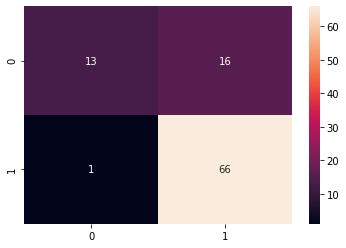

In [34]:
sns.heatmap(con,annot = True)

In [35]:
clsreport = classification_report(ytest,ypred)
clsreport

'              precision    recall  f1-score   support\n\n           0       0.93      0.45      0.60        29\n           1       0.80      0.99      0.89        67\n\n    accuracy                           0.82        96\n   macro avg       0.87      0.72      0.75        96\nweighted avg       0.84      0.82      0.80        96\n'

In [37]:
from sklearn import metrics

In [38]:
ypred_prob = model.predict_proba(xtest)[:,1]

In [39]:
fpr,tpr,_ = metrics.roc_curve(ytest,ypred_prob)

In [40]:
auc = metrics.roc_auc_score(ytest,ypred_prob)

In [41]:
auc

0.7704580545548121

AUC : 0.7704580545548121


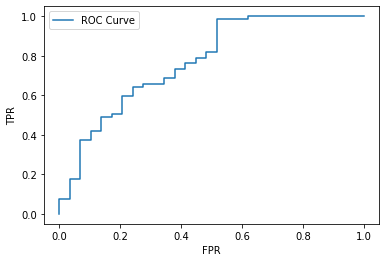

In [42]:
plt.plot(fpr,tpr,label = 'ROC Curve')
print('AUC :',auc)
plt.xlabel('FPR')
plt.ylabel("TPR")
plt.legend()